In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

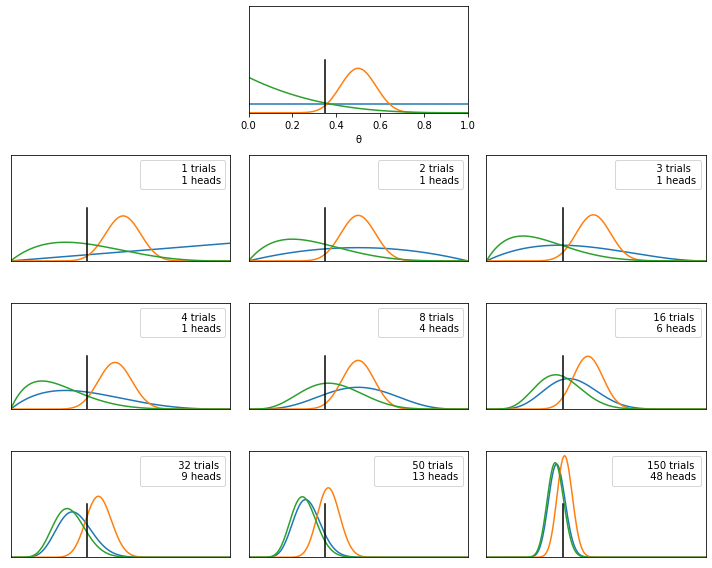

In [13]:
plt.figure(figsize=(10, 8))
# observations from 10 experiments
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data     = [0, 1, 1, 1, 1, 4,  6,  9, 13,  48]
theta_real = 0.35
# three priors: uniform, centered, skewed
beta_params = [(1, 1), (20, 20), (1, 4)]
dist        = stats.beta
x           = np.linspace(0, 1, 200)
# loop over experiments
for idx, n in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + n - y)
        plt.plot(x, p_theta_given_y)
    plt.axvline(theta_real, ymax=0.5, color='k')
    if idx != 0: 
        plt.plot(0, 0, label=f'{n:4d} trials\n{y:4d} heads', alpha=0)
        plt.legend()
    plt.xlim(0, 1), plt.ylim(0, 12), plt.yticks([])
plt.tight_layout()